In [1]:
import transfer
from community import *
import  matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3
import matplotlib.animation as animation
import numpy as np
from datetime import datetime

# There is an option to set a file-name -- would highly recommend doing that.
date_time = datetime.now().strftime("%m_%d_%Y_%H:%M:%S")


In [2]:
""" simulate returns an animated 3d scatter plot of the community allIdeas object.
The input parameters are the community, the interaction coefficient gamma, 
and also fn, a string file-name which defaults to date and time."""
def simulate(X=None, gamma = 0.005, T = 80,fn=date_time):
    # seems like the same community is used again and again if I do not specify None case below.
    if X is None:
        X = community(300,3)
    fps = 40

    # Data to store X.allIdeas, to then make animation
    dataX = np.ndarray((T*fps,X.numberMembers))
    dataY = np.ndarray((T*fps,X.numberMembers))
    dataZ = np.ndarray((T*fps,X.numberMembers))

    # Iterate the idea transfer throughout community
    for t in range(0,T+1):
        dataX[t,:] = X.allIdeas[:,0]
        dataY[t,:] = X.allIdeas[:,1]
        dataZ[t,:] = X.allIdeas[:,2]
        #transfer.deterministicMerge(X, gamma/(t+1)**0.5)
        transfer.probabilisticMerge(X, gamma/(t+1)**0.5)

    # Plot results
    fig = plt.figure()
    ax = fig.add_subplot(111,projection='3d')
    ax.scatter3D(dataX[0], dataY[0], dataZ[0])

    axTicks = np.linspace(0,c.domainSize,4)

    #animation function for animation.FuncAnimation
    def update(ifrm,dataX,dataY,dataZ):
        ax.clear()
        plt.autoscale(False)
        ax.set_xticks(axTicks)
        ax.set_yticks(axTicks)
        ax.set_zticks(axTicks)
        ax.scatter3D(dataX[ifrm], dataY[ifrm], dataZ[ifrm])
        ax.set_xlabel("frame: %d" % (ifrm))

    ani = animation.FuncAnimation(fig, update, T, fargs=(dataX,dataY,dataZ),interval = T/fps )
    ani.save(fn+'.gif',writer='imagemagick',fps=fps)

    plt.show()


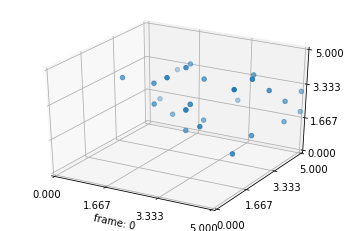

In [3]:
c = community(numberMembers=30,numberIdeas=3,domainSize=5)
simulate(c,gamma=0.5,T=240)

In [4]:
c.allIdeas.min()

0

In [5]:
c.ideaDistribution

array([[[0.20767611, 0.20267847, 0.19818448, 0.19194153, 0.19951941],
        [0.20732749, 0.19777036, 0.19711993, 0.2021756 , 0.19560663],
        [0.19199732, 0.20814539, 0.20541195, 0.20204984, 0.1923955 ]],

       [[0.20785259, 0.20266862, 0.19813713, 0.19181557, 0.1995261 ],
        [0.20745246, 0.19776636, 0.19704624, 0.20220489, 0.19553005],
        [0.19184149, 0.20828025, 0.20553053, 0.20209209, 0.19225564]],

       [[0.20037031, 0.20012921, 0.1999124 , 0.19961111, 0.19997696],
        [0.20035347, 0.1998925 , 0.19986098, 0.20010494, 0.19978812],
        [0.19961395, 0.20039299, 0.20026129, 0.20009883, 0.19963294]],

       [[0.2079176 , 0.20267225, 0.19812026, 0.19176314, 0.19952675],
        [0.20750284, 0.19776007, 0.19701987, 0.20221779, 0.19549943],
        [0.19178122, 0.20833525, 0.20557481, 0.20210814, 0.19220057]],

       [[0.20779372, 0.20267237, 0.19815299, 0.19185712, 0.1995238 ],
        [0.20741088, 0.19776749, 0.19707082, 0.20219523, 0.19555559],
        [0.1

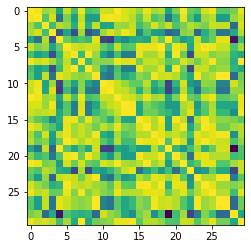

In [6]:
plt.imshow(c.agreementMatrix)

In [7]:
c.agreementMatrix

array([[1.        , 0.98644005, 0.92386977, 0.93697496, 0.79091158,
        0.95454545, 0.85361006, 0.98721777, 0.85361006, 0.87038828,
        0.96167831, 0.95533029, 1.        , 0.96840025, 0.95742711,
        0.9216805 , 0.98246661, 0.93075784, 0.94371655, 0.79282497,
        0.89940122, 0.99498744, 0.88396   , 0.86464308, 0.9648363 ,
        0.98473193, 0.87038828, 0.87038828, 0.89527379, 0.98246661],
       [0.98644005, 1.        , 0.8618575 , 0.96609178, 0.68300095,
        0.89940122, 0.78173596, 0.95685806, 0.78173596, 0.77777778,
        0.98745695, 0.99088071, 0.98644005, 0.97132373, 0.94444444,
        0.87229889, 0.95714262, 0.85812787, 0.88582334, 0.69006556,
        0.83333333, 0.98149546, 0.86117511, 0.77264387, 0.92376043,
        0.94280904, 0.77777778, 0.77777778, 0.91927239, 0.95714262],
       [0.92386977, 0.8618575 , 1.        , 0.84515425, 0.94561086,
        0.92386977, 0.81236239, 0.97182532, 0.81236239, 0.95257934,
        0.78446454, 0.79349205, 0.92386977, 0.

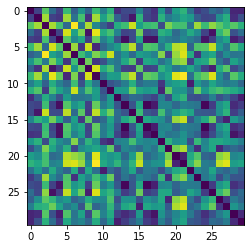

In [8]:
plt.imshow(c.distanceMatrix)

In [9]:
c.distanceMatrix

array([[0.        , 0.4125044 , 1.54630131, 0.74315873, 0.39521919,
        1.41821667, 0.64103565, 1.09300711, 0.65836352, 1.41033176,
        0.90755656, 1.33105184, 0.27575827, 0.46359882, 0.47666205,
        0.95742149, 0.47101096, 0.31149096, 1.12105002, 0.49834439,
        1.17791893, 1.36892515, 0.79482038, 0.35419124, 0.49667031,
        0.75339395, 0.63574415, 0.90318454, 0.22590627, 0.21596802],
       [0.4125044 , 0.        , 1.80747429, 0.40318885, 0.33571133,
        1.79123811, 0.78869626, 1.47762001, 0.29742968, 1.80597567,
        1.20468322, 1.52886778, 0.66427349, 0.4068391 , 0.13417899,
        1.36791852, 0.42638973, 0.34145893, 1.34334455, 0.85262924,
        1.03614472, 1.23943392, 1.13217731, 0.620805  , 0.43500834,
        0.45814654, 1.02806188, 1.31469437, 0.27537633, 0.52432613],
       [1.54630131, 1.80747429, 0.        , 1.82322293, 1.49036814,
        0.72260769, 2.08890923, 0.84072923, 1.83168671, 0.96505595,
        0.64426058, 0.37882503, 1.30266709, 1.